In [1]:
print(" Installing required packages...")
!pip install openai anthropic groq requests pandas numpy matplotlib seaborn wordcloud plotly -q
print(" Dependencies installed successfully")


 Installing required packages...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 7.1 MB/s eta 0:00:00
 Dependencies installed successfully


In [2]:
import json
import random
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
from dataclasses import dataclass
from typing import List, Dict, Any
import warnings
warnings.filterwarnings('ignore')

print(" Libraries imported successfully")


 Libraries imported successfully


In [3]:
@dataclass
class CustomerPersona:
    name: str
    age_range: str
    income_level: str
    interests: List[str]
    behavior: str
    preferred_channels: List[str]
    pain_points: List[str]
    buying_motivation: str

@dataclass
class CampaignContent:
    persona: str
    headline: str
    body_text: str
    cta: str
    channel: str
    tone: str
    keywords: List[str]

class MarketResearchAgent:

    def __init__(self):
        self.name = "Market Research Agent"
        self.personas_db = {
            "tech_products": [
                CustomerPersona("Tech Enthusiast", "25-35", "High",
                               ["gadgets", "innovation", "productivity"], "Early adopter",
                               ["social media", "tech blogs", "email"], ["complexity", "price"],
                               "Latest features"),
                CustomerPersona("Professional", "30-45", "Medium-High",
                               ["efficiency", "career growth", "networking"], "Practical buyer",
                               ["LinkedIn", "email", "webinars"], ["time constraints", "ROI"],
                               "Productivity gains"),
                CustomerPersona("Budget Conscious", "20-30", "Low-Medium",
                               ["value", "reviews", "comparisons"], "Research-heavy",
                               ["price comparison sites", "forums"], ["cost", "quality concerns"],
                               "Best value for money")
            ],
            "fashion_products": [
                CustomerPersona("Fashion Forward", "18-28", "Medium",
                               ["trends", "style", "social media"], "Impulse buyer",
                               ["Instagram", "TikTok", "fashion blogs"], ["sizing", "returns"],
                               "Style statement"),
                CustomerPersona("Classic Shopper", "35-50", "Medium-High",
                               ["quality", "timeless pieces", "comfort"], "Considered buyer",
                               ["email", "brand websites", "magazines"], ["durability", "fit"],
                               "Long-term wardrobe"),
                CustomerPersona("Eco-Conscious", "25-40", "Medium",
                               ["sustainability", "ethics", "environment"], "Values-driven",
                               ["social media", "blogs", "word-of-mouth"], ["greenwashing", "price premium"],
                               "Environmental impact")
            ],
            "food_products": [
                CustomerPersona("Health Enthusiast", "25-45", "Medium-High",
                               ["nutrition", "fitness", "wellness"], "Label reader",
                               ["health blogs", "social media", "apps"], ["additives", "sugar content"],
                               "Health benefits"),
                CustomerPersona("Busy Parent", "30-45", "Medium",
                               ["convenience", "family", "time-saving"], "Efficiency seeker",
                               ["email", "grocery apps", "parenting sites"], ["time", "kid approval"],
                               "Family satisfaction"),
                CustomerPersona("Food Explorer", "22-35", "Medium",
                               ["new experiences", "culture", "cooking"], "Adventurous",
                               ["food blogs", "social media", "reviews"], ["authenticity", "complexity"],
                               "Culinary experience")
            ],
            "default": [
                CustomerPersona("General Consumer", "25-45", "Medium",
                               ["value", "quality", "convenience"], "Balanced buyer",
                               ["search engines", "reviews", "social media"], ["price", "quality"],
                               "Problem solution")
            ]
        }

    def analyze_product(self, product_name: str) -> Dict[str, Any]:
        product_lower = product_name.lower()

        if any(word in product_lower for word in ['phone', 'laptop', 'software', 'app', 'tech', 'device']):
            category = "tech_products"
        elif any(word in product_lower for word in ['clothes', 'fashion', 'dress', 'shoes', 'bag', 'style']):
            category = "fashion_products"
        elif any(word in product_lower for word in ['food', 'snack', 'drink', 'meal', 'nutrition']):
            category = "food_products"
        else:
            category = "default"

        return {
            "category": category,
            "personas": self.personas_db.get(category, self.personas_db["default"]),
            "market_insights": self._generate_market_insights(product_name, category)
        }

    def _generate_market_insights(self, product_name: str, category: str) -> Dict[str, Any]:
        insights = {
            "market_size": f"${random.randint(50, 500)}M",
            "growth_rate": f"{random.randint(5, 25)}% annually",
            "key_trends": [],
            "competitive_landscape": "Moderate to High competition",
            "seasonality": "Low" if category == "tech_products" else "Moderate"
        }

        if category == "tech_products":
            insights["key_trends"] = ["AI integration", "Privacy focus", "Sustainability", "Remote work solutions"]
        elif category == "fashion_products":
            insights["key_trends"] = ["Sustainable fashion", "Inclusive sizing", "Digital try-on", "Personalization"]
        elif category == "food_products":
            insights["key_trends"] = ["Health consciousness", "Plant-based options", "Convenience", "Local sourcing"]
        else:
            insights["key_trends"] = ["Digital transformation", "Personalization", "Sustainability", "Value focus"]

        return insights

class ContentCreationAgent:

    def __init__(self):
        self.name = "Content Creation Agent"
        self.tone_templates = {
            "professional": "Leverage our advanced {} to enhance your productivity and achieve your goals.",
            "casual": "Check out this amazing {} - it's going to make your life so much easier!",
            "urgent": "Don't miss out! This {} is flying off the shelves for good reason.",
            "educational": "Discover how {} can transform your daily routine with these key benefits:",
            "emotional": "Experience the joy and satisfaction that {} brings to thousands of happy customers."
        }

    def create_campaign_content(self, product_name: str, persona: CustomerPersona,
                              market_data: Dict[str, Any]) -> CampaignContent:

        tone = self._select_tone(persona)
        channel = random.choice(persona.preferred_channels)

        headline = self._generate_headline(product_name, persona, tone)
        body_text = self._generate_body_text(product_name, persona, market_data, tone)
        cta = self._generate_cta(persona, channel)
        keywords = self._generate_keywords(product_name, persona, market_data)

        return CampaignContent(
            persona=persona.name,
            headline=headline,
            body_text=body_text,
            cta=cta,
            channel=channel,
            tone=tone,
            keywords=keywords
        )

    def _select_tone(self, persona: CustomerPersona) -> str:
        """Select appropriate tone based on persona"""
        if "Professional" in persona.name:
            return "professional"
        elif "Enthusiast" in persona.name or "Explorer" in persona.name:
            return "casual"
        elif "Budget" in persona.name or "value" in persona.interests:
            return "urgent"
        elif "Health" in persona.name or "Eco" in persona.name:
            return "educational"
        else:
            return "emotional"

    def _generate_headline(self, product_name: str, persona: CustomerPersona, tone: str) -> str:
        headlines = {
            "professional": f"Boost Your Productivity with {product_name}",
            "casual": f"{product_name}: Your New Favorite Thing!",
            "urgent": f"Limited Time: Get {product_name} Before It's Gone!",
            "educational": f"The Science Behind {product_name}'s Success",
            "emotional": f"Fall in Love with {product_name}"
        }

        base_headline = headlines.get(tone, f"Discover {product_name}")

        if "efficiency" in persona.interests:
            base_headline = f"Maximize Efficiency with {product_name}"
        elif "trends" in persona.interests:
            base_headline = f"Stay Ahead: {product_name} is Trending Now"
        elif "value" in persona.interests:
            base_headline = f"Exceptional Value: {product_name} Delivers More"

        return base_headline

    def _generate_body_text(self, product_name: str, persona: CustomerPersona,
                           market_data: Dict[str, Any], tone: str) -> str:
        pain_point_solutions = {
            "complexity": f"{product_name} simplifies everything with an intuitive design",
            "price": f"Get premium quality at an affordable price with {product_name}",
            "time constraints": f"{product_name} saves you hours every week",
            "quality concerns": f"{product_name} is built to last with premium materials"
        }

        body_parts = []

        if tone == "professional":
            body_parts.append(f"In today's competitive landscape, {product_name} gives you the edge you need.")
        elif tone == "casual":
            body_parts.append(f"We're excited to introduce you to {product_name}!")
        elif tone == "urgent":
            body_parts.append(f"Join thousands who've already discovered {product_name}.")

        for pain_point in persona.pain_points:
            if pain_point in pain_point_solutions:
                body_parts.append(pain_point_solutions[pain_point])

        trends = market_data.get("market_insights", {}).get("key_trends", [])
        if trends:
            body_parts.append(f"Aligned with current trends like {', '.join(trends[:2])}")

        motivation_closers = {
            "Latest features": "Stay ahead with cutting-edge innovation.",
            "Productivity gains": "Transform how you work and achieve more.",
            "Best value for money": "Premium quality without the premium price.",
            "Style statement": "Express your unique personality and style.",
            "Environmental impact": "Make a positive difference with every purchase."
        }

        if persona.buying_motivation in motivation_closers:
            body_parts.append(motivation_closers[persona.buying_motivation])

        return " ".join(body_parts)

    def _generate_cta(self, persona: CustomerPersona, channel: str) -> str:
        ctas = {
            "email": ["Shop Now", "Learn More", "Get Started Today"],
            "social media": ["Swipe Up to Shop", "Link in Bio", "DM for Details"],
            "search engines": ["Buy Now", "Compare Prices", "Read Reviews"],
            "blogs": ["Read Full Review", "Get Discount Code", "Subscribe for Updates"]
        }

        default_ctas = ["Shop Now", "Learn More", "Get Started"]

        for key in ctas.keys():
            if key in channel.lower():
                return random.choice(ctas[key])

        return random.choice(default_ctas)

    def _generate_keywords(self, product_name: str, persona: CustomerPersona,
                          market_data: Dict[str, Any]) -> List[str]:
        keywords = [product_name.lower()]
        keywords.extend(persona.interests)

        category = market_data.get("category", "default")
        category_keywords = {
            "tech_products": ["innovation", "technology", "digital", "smart"],
            "fashion_products": ["style", "fashion", "trendy", "designer"],
            "food_products": ["healthy", "delicious", "organic", "fresh"],
            "default": ["quality", "reliable", "affordable", "popular"]
        }

        keywords.extend(category_keywords.get(category, category_keywords["default"]))

        return list(set(keywords))

class PersonalizationAgent:

    def __init__(self):
        self.name = "Personalization Agent"

    def optimize_campaigns(self, campaigns: List[CampaignContent],
                         product_name: str) -> List[CampaignContent]:
        """Optimize campaigns for better personalization"""
        optimized_campaigns = []

        for campaign in campaigns:
            optimized_campaign = self._optimize_single_campaign(campaign, product_name)
            optimized_campaigns.append(optimized_campaign)

        return optimized_campaigns

    def _optimize_single_campaign(self, campaign: CampaignContent,
                                 product_name: str) -> CampaignContent:

        personalized_headline = self._add_personalization(campaign.headline, campaign.persona)
        personalized_body = self._add_personalization(campaign.body_text, campaign.persona)

        optimized_cta = self._optimize_cta_for_channel(campaign.cta, campaign.channel)

        return CampaignContent(
            persona=campaign.persona,
            headline=personalized_headline,
            body_text=personalized_body,
            cta=optimized_cta,
            channel=campaign.channel,
            tone=campaign.tone,
            keywords=campaign.keywords
        )

    def _add_personalization(self, text: str, persona: str) -> str:
        personalization_prefixes = {
            "Tech Enthusiast": "For the innovator in you: ",
            "Professional": "Boost your career: ",
            "Budget Conscious": "Smart savings: ",
            "Fashion Forward": "Trendsetter alert: ",
            "Health Enthusiast": "For your wellness journey: ",
            "Busy Parent": "Make parenting easier: "
        }

        prefix = personalization_prefixes.get(persona, "")
        if prefix and not text.startswith(prefix):
            return prefix + text

        return text

    def _optimize_cta_for_channel(self, cta: str, channel: str) -> str:
        channel_optimizations = {
            "email": lambda x: f" {x}",
            "social media": lambda x: f" {x}",
            "Instagram": lambda x: f" {x}",
            "LinkedIn": lambda x: f" {x}"
        }

        for key, optimizer in channel_optimizations.items():
            if key.lower() in channel.lower():
                return optimizer(cta)

        return cta

class AnalyticsAgent:

    def __init__(self):
        self.name = "Analytics Agent"

    def generate_campaign_analytics(self, campaigns: List[CampaignContent],
                                  product_name: str) -> Dict[str, Any]:

        analytics = {
            "campaign_summary": self._generate_campaign_summary(campaigns, product_name),
            "persona_distribution": self._analyze_persona_distribution(campaigns),
            "channel_analysis": self._analyze_channel_distribution(campaigns),
            "keyword_analysis": self._analyze_keywords(campaigns),
            "predicted_performance": self._predict_campaign_performance(campaigns),
            "recommendations": self._generate_recommendations(campaigns)
        }

        return analytics

    def _generate_campaign_summary(self, campaigns: List[CampaignContent],
                                  product_name: str) -> Dict[str, Any]:
        return {
            "product_name": product_name,
            "total_campaigns": len(campaigns),
            "unique_personas": len(set(c.persona for c in campaigns)),
            "channels_covered": len(set(c.channel for c in campaigns)),
            "total_keywords": sum(len(c.keywords) for c in campaigns),
            "tone_variety": len(set(c.tone for c in campaigns))
        }

    def _analyze_persona_distribution(self, campaigns: List[CampaignContent]) -> Dict[str, int]:
        persona_counts = {}
        for campaign in campaigns:
            persona_counts[campaign.persona] = persona_counts.get(campaign.persona, 0) + 1
        return persona_counts

    def _analyze_channel_distribution(self, campaigns: List[CampaignContent]) -> Dict[str, int]:
        channel_counts = {}
        for campaign in campaigns:
            channel_counts[campaign.channel] = channel_counts.get(campaign.channel, 0) + 1
        return channel_counts

    def _analyze_keywords(self, campaigns: List[CampaignContent]) -> Dict[str, Any]:
        all_keywords = []
        for campaign in campaigns:
            all_keywords.extend(campaign.keywords)

        keyword_counts = {}
        for keyword in all_keywords:
            keyword_counts[keyword] = keyword_counts.get(keyword, 0) + 1

        return {
            "total_unique_keywords": len(set(all_keywords)),
            "most_common_keywords": sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)[:10],
            "keyword_frequency": keyword_counts
        }

    def _predict_campaign_performance(self, campaigns: List[CampaignContent]) -> Dict[str, Any]:
        """Predict campaign performance metrics"""

        performance_predictions = {}

        for campaign in campaigns:
            base_ctr = {
                "email": 0.025,
                "social media": 0.018,
                "Instagram": 0.020,
                "LinkedIn": 0.028,
                "search engines": 0.035
            }.get(campaign.channel, 0.020)

            tone_multiplier = {
                "professional": 1.1,
                "casual": 1.0,
                "urgent": 1.2,
                "educational": 0.9,
                "emotional": 1.15
            }.get(campaign.tone, 1.0)

            predicted_ctr = base_ctr * tone_multiplier * random.uniform(0.8, 1.2)
            predicted_conversion = predicted_ctr * random.uniform(0.15, 0.35)

            performance_predictions[campaign.persona] = {
                "predicted_ctr": round(predicted_ctr, 4),
                "predicted_conversion_rate": round(predicted_conversion, 4),
                "estimated_reach": random.randint(1000, 10000),
                "confidence_score": random.uniform(0.7, 0.95)
            }

        return performance_predictions

    def _generate_recommendations(self, campaigns: List[CampaignContent]) -> List[str]:
        recommendations = []

        channels = set(c.channel for c in campaigns)
        if len(channels) < 3:
            recommendations.append("Consider expanding to more marketing channels for broader reach")

        tones = set(c.tone for c in campaigns)
        if len(tones) < 3:
            recommendations.append("Diversify campaign tones to appeal to different audience segments")

        all_keywords = []
        for campaign in campaigns:
            all_keywords.extend(campaign.keywords)

        if len(set(all_keywords)) < 10:
            recommendations.append("Expand keyword strategy for better SEO and targeting")

        recommendations.extend([
            "A/B test different headlines to optimize performance",
            "Monitor campaign performance and adjust based on real-time data",
            "Consider seasonal adjustments for campaign timing",
            "Implement retargeting campaigns for better conversion rates"
        ])

        return recommendations

print(" Agent classes defined successfully")


 Agent classes defined successfully


In [4]:
class MarketingCampaignOrchestrator:

    def __init__(self):
        self.market_research_agent = MarketResearchAgent()
        self.content_creation_agent = ContentCreationAgent()
        self.personalization_agent = PersonalizationAgent()
        self.analytics_agent = AnalyticsAgent()

        print(" Multi-Agent Marketing System Initialized!")
        print(" Agents loaded:")
        print(f"   • {self.market_research_agent.name}")
        print(f"   • {self.content_creation_agent.name}")
        print(f"   • {self.personalization_agent.name}")
        print(f"   • {self.analytics_agent.name}")

    def create_marketing_campaign(self, product_name: str) -> Dict[str, Any]:

        print(f"\n Creating Marketing Campaign for: '{product_name}'")
        print("-" * 60)

        print("\n Step 1: Market Research Agent analyzing product...")
        market_data = self.market_research_agent.analyze_product(product_name)
        print(f"    Product categorized as: {market_data['category']}")
        print(f"    {len(market_data['personas'])} personas identified")

        print("\n Step 2: Content Creation Agent generating campaigns...")
        campaigns = []
        for persona in market_data['personas']:
            campaign = self.content_creation_agent.create_campaign_content(
                product_name, persona, market_data
            )
            campaigns.append(campaign)
            print(f"    Campaign created for '{persona.name}' persona")
        print("\n Step 3: Personalization Agent optimizing campaigns...")
        optimized_campaigns = self.personalization_agent.optimize_campaigns(campaigns, product_name)
        print(f"    {len(optimized_campaigns)} campaigns optimized")

        print("\n Step 4: Analytics Agent generating insights...")
        analytics = self.analytics_agent.generate_campaign_analytics(optimized_campaigns, product_name)
        print("    Analytics and performance predictions generated")

        return {
            "product_name": product_name,
            "market_data": market_data,
            "campaigns": optimized_campaigns,
            "analytics": analytics,
            "timestamp": datetime.now().isoformat()
        }

print(" Marketing Campaign Orchestrator ready")



 Marketing Campaign Orchestrator ready


In [6]:
class CampaignVisualizer:

    def __init__(self):
        plt.style.use('default')
        sns.set_palette("husl")

    def create_campaign_dashboard(self, campaign_results: Dict[str, Any]):

        campaigns = campaign_results['campaigns']
        analytics = campaign_results['analytics']
        product_name = campaign_results['product_name']

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle(f'Marketing Campaign Dashboard: {product_name}', fontsize=16, fontweight='bold')

        personas = list(analytics['persona_distribution'].keys())
        persona_counts = list(analytics['persona_distribution'].values())

        colors = plt.cm.Set3(np.linspace(0, 1, len(personas)))
        ax1.pie(persona_counts, labels=personas, autopct='%1.1f%%', colors=colors)
        ax1.set_title('Campaign Distribution by Persona')

        channels = list(analytics['channel_analysis'].keys())
        channel_counts = list(analytics['channel_analysis'].values())

        bars = ax2.bar(channels, channel_counts, color=plt.cm.Pastel1(np.linspace(0, 1, len(channels))))
        ax2.set_title('Campaigns by Channel')
        ax2.set_ylabel('Number of Campaigns')
        ax2.tick_params(axis='x', rotation=45)

        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom')

        performance_data = analytics['predicted_performance']
        personas_perf = list(performance_data.keys())
        ctrs = [performance_data[p]['predicted_ctr'] for p in personas_perf]
        conversions = [performance_data[p]['predicted_conversion_rate'] for p in personas_perf]

        x = np.arange(len(personas_perf))
        width = 0.35

        bars1 = ax3.bar(x - width/2, ctrs, width, label='CTR', alpha=0.8)
        bars2 = ax3.bar(x + width/2, conversions, width, label='Conversion Rate', alpha=0.8)

        ax3.set_title('Predicted Performance by Persona')
        ax3.set_ylabel('Rate')
        ax3.set_xticks(x)
        ax3.set_xticklabels(personas_perf, rotation=45, ha='right')
        ax3.legend()
        keywords_data = analytics['keyword_analysis']['most_common_keywords'][:8]
        if keywords_data:
            keywords = [item[0] for item in keywords_data]
            frequencies = [item[1] for item in keywords_data]

            bars = ax4.barh(keywords, frequencies, color=plt.cm.viridis(np.linspace(0, 1, len(keywords))))
            ax4.set_title('Top Keywords by Frequency')
            ax4.set_xlabel('Frequency')
            for i, bar in enumerate(bars):
                width = bar.get_width()
                ax4.text(width, bar.get_y() + bar.get_height()/2.,
                        f'{int(width)}', ha='left', va='center')
        else:
            ax4.text(0.5, 0.5, 'No keyword data available', ha='center', va='center',
                    transform=ax4.transAxes, fontsize=12)
            ax4.set_title('Top Keywords')

        plt.tight_layout()
        plt.show()

        return fig

    def create_word_cloud(self, campaign_results: Dict[str, Any]):
        campaigns = campaign_results['campaigns']

        all_text = []
        for campaign in campaigns:
            all_text.extend(campaign.keywords)
            all_text.extend(campaign.headline.split())
            all_text.extend(campaign.body_text.split())

        word_freq = {}
        for word in all_text:
            clean_word = word.lower().strip('.,!?;:"()[]{}')
            if len(clean_word) > 2 and clean_word not in ['the', 'and', 'with', 'for', 'you', 'your']:
                word_freq[clean_word] = word_freq.get(clean_word, 0) + 1

        if word_freq:
            plt.figure(figsize=(12, 6))

            wordcloud = WordCloud(width=800, height=400,
                                 background_color='white',
                                 colormap='viridis',
                                 max_words=50).generate_from_frequencies(word_freq)

            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Campaign Word Cloud: {campaign_results["product_name"]}',
                     fontsize=16, fontweight='bold', pad=20)
            plt.tight_layout()
            plt.show()
        else:
            print(" No suitable words found for word cloud generation")

print(" Visualization tools ready")



 Visualization tools ready


In [7]:
def display_campaign_results(campaign_results: Dict[str, Any]):

    product_name = campaign_results['product_name']
    campaigns = campaign_results['campaigns']
    analytics = campaign_results['analytics']
    market_data = campaign_results['market_data']

    print(f"\n{'='*80}")
    print(f" MARKETING CAMPAIGN RESULTS FOR: {product_name.upper()}")
    print(f"{'='*80}")

    print(f"\n MARKET RESEARCH SUMMARY")
    print(f"{'-'*50}")
    print(f"Product Category: {market_data['category']}")
    print(f"Market Size: {market_data['market_insights']['market_size']}")
    print(f"Growth Rate: {market_data['market_insights']['growth_rate']}")
    print(f"Key Trends: {', '.join(market_data['market_insights']['key_trends'])}")

    summary = analytics['campaign_summary']
    print(f"\n CAMPAIGN OVERVIEW")
    print(f"{'-'*50}")
    print(f"Total Campaigns Generated: {summary['total_campaigns']}")
    print(f"Unique Personas Targeted: {summary['unique_personas']}")
    print(f"Marketing Channels: {summary['channels_covered']}")
    print(f"Total Keywords: {summary['total_keywords']}")
    print(f"Tone Variations: {summary['tone_variety']}")

    print(f"\n DETAILED CAMPAIGN BREAKDOWN")
    print(f"{'-'*50}")

    for i, campaign in enumerate(campaigns, 1):
        print(f"\n Campaign #{i}: {campaign.persona}")
        print(f"   Channel: {campaign.channel}")
        print(f"   Tone: {campaign.tone}")
        print(f"   Headline: {campaign.headline}")
        print(f"   Body: {campaign.body_text[:100]}...")
        print(f"   CTA: {campaign.cta}")
        print(f"   Keywords: {', '.join(campaign.keywords[:5])}")

        if campaign.persona in analytics['predicted_performance']:
            perf = analytics['predicted_performance'][campaign.persona]
            print(f"    Predicted CTR: {perf['predicted_ctr']:.2%}")
            print(f"    Predicted Conversion: {perf['predicted_conversion_rate']:.2%}")
            print(f"    Estimated Reach: {perf['estimated_reach']:,}")

    print(f"\n ANALYTICS & INSIGHTS")
    print(f"{'-'*50}")

    top_keywords = analytics['keyword_analysis']['most_common_keywords'][:5]
    print(f"Top Keywords: {', '.join([kw[0] for kw in top_keywords])}")

    print(f"Channel Distribution:")
    for channel, count in analytics['channel_analysis'].items():
        percentage = (count / len(campaigns)) * 100
        print(f"   • {channel}: {count} campaigns ({percentage:.1f}%)")

    print(f"\n PERFORMANCE PREDICTIONS")
    print(f"{'-'*50}")
    all_ctrs = [perf['predicted_ctr'] for perf in analytics['predicted_performance'].values()]
    all_conversions = [perf['predicted_conversion_rate'] for perf in analytics['predicted_performance'].values()]

    print(f"Average Predicted CTR: {np.mean(all_ctrs):.2%}")
    print(f"Average Predicted Conversion: {np.mean(all_conversions):.2%}")
    print(f"Best Performing Persona: {max(analytics['predicted_performance'].items(), key=lambda x: x[1]['predicted_ctr'])[0]}")

    print(f"\n OPTIMIZATION RECOMMENDATIONS")
    print(f"{'-'*50}")
    for i, rec in enumerate(analytics['recommendations'][:5], 1):
        print(f"{i}. {rec}")

def create_campaign_report(campaign_results: Dict[str, Any]) -> pd.DataFrame:

    campaigns = campaign_results['campaigns']
    analytics = campaign_results['analytics']

    report_data = []

    for campaign in campaigns:
        perf_data = analytics['predicted_performance'].get(campaign.persona, {})

        report_row = {
            'Campaign_ID': f"CAMP_{campaigns.index(campaign)+1:03d}",
            'Product': campaign_results['product_name'],
            'Persona': campaign.persona,
            'Channel': campaign.channel,
            'Tone': campaign.tone,
            'Headline': campaign.headline,
            'Body_Text': campaign.body_text,
            'CTA': campaign.cta,
            'Keywords': ', '.join(campaign.keywords),
            'Predicted_CTR': perf_data.get('predicted_ctr', 0),
            'Predicted_Conversion': perf_data.get('predicted_conversion_rate', 0),
            'Estimated_Reach': perf_data.get('estimated_reach', 0),
            'Confidence_Score': perf_data.get('confidence_score', 0)
        }

        report_data.append(report_row)

    df = pd.DataFrame(report_data)

    print(f"\n CAMPAIGN REPORT TABLE")
    print(f"{'-'*50}")
    print(df.to_string(index=False, max_colwidth=50))

    return df

print(" Display functions ready")


 Display functions ready


In [8]:
def run_marketing_campaign_generator():

    print("\n" + "-"*80)
    print(" AI-POWERED MULTI-AGENT MARKETING CAMPAIGN GENERATOR")
    print("-"*80)
    print("\nThis system uses 4 AI agents working together:")
    print(" Market Research Agent - Analyzes products and identifies personas")
    print("  Content Creation Agent - Creates personalized marketing content")
    print(" Personalization Agent - Optimizes campaigns for each persona")
    print(" Analytics Agent - Provides insights and performance predictions")

    orchestrator = MarketingCampaignOrchestrator()
    visualizer = CampaignVisualizer()

    return orchestrator, visualizer



In [14]:
def generate_campaign_for_product(product_name: str):

    orchestrator, visualizer = run_marketing_campaign_generator()

    start_time = time.time()
    campaign_results = orchestrator.create_marketing_campaign(product_name)
    end_time = time.time()

    print(f"\n Campaign generation completed in {end_time - start_time:.2f} seconds")

    display_campaign_results(campaign_results)

    print(f"\n GENERATING VISUALIZATIONS")
    print(f"{'-'*50}")

    print(" Creating campaign dashboard...")
    visualizer.create_campaign_dashboard(campaign_results)

    print(" Creating word cloud...")
    visualizer.create_word_cloud(campaign_results)

    print(" Creating detailed report...")
    report_df = create_campaign_report(campaign_results)

    print(f"\n EXPORT OPTIONS")
    print(f"{'-'*50}")
    print("• report_df.to_csv('marketing_campaign_report.csv', index=False)")
    print("• Save visualizations using plt.savefig()")

    return campaign_results, report_df

print(" All functions loaded successfully")



 All functions loaded successfully


In [15]:
def demo_campaign_generator():

    demo_products = [
        "Smartphone",
        "Organic Coffee",
        "Running Shoes",
        "Productivity App",
        "Eco-friendly Clothing"
    ]

    print("\n DEMO MODE - Sample Products")
    print("-"*60)

    for i, product in enumerate(demo_products, 1):
        print(f"{i}. {product}")

    print("\nChoose a demo product (1-5) or enter your own product name:")
    return demo_products

print("-"*80)
print("\n MULTI-AGENT MARKETING SYSTEM READY")
print("-"*80)


--------------------------------------------------------------------------------

 MULTI-AGENT MARKETING SYSTEM READY
--------------------------------------------------------------------------------



 GENERATING MARKETING CAMPAIGN FOR: Wireless Headphones
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
 AI-POWERED MULTI-AGENT MARKETING CAMPAIGN GENERATOR
--------------------------------------------------------------------------------

This system uses 4 AI agents working together:
 Market Research Agent - Analyzes products and identifies personas
  Content Creation Agent - Creates personalized marketing content
 Personalization Agent - Optimizes campaigns for each persona
 Analytics Agent - Provides insights and performance predictions
 Multi-Agent Marketing System Initialized!
 Agents loaded:
   • Market Research Agent
   • Content Creation Agent
   • Personalization Agent
   • Analytics Agent

 Creating Marketing Campaign for: 'Wireless Headphones'
------------------------------------------------------------

 Step 1: Market Research Agent analyzing product...
    P

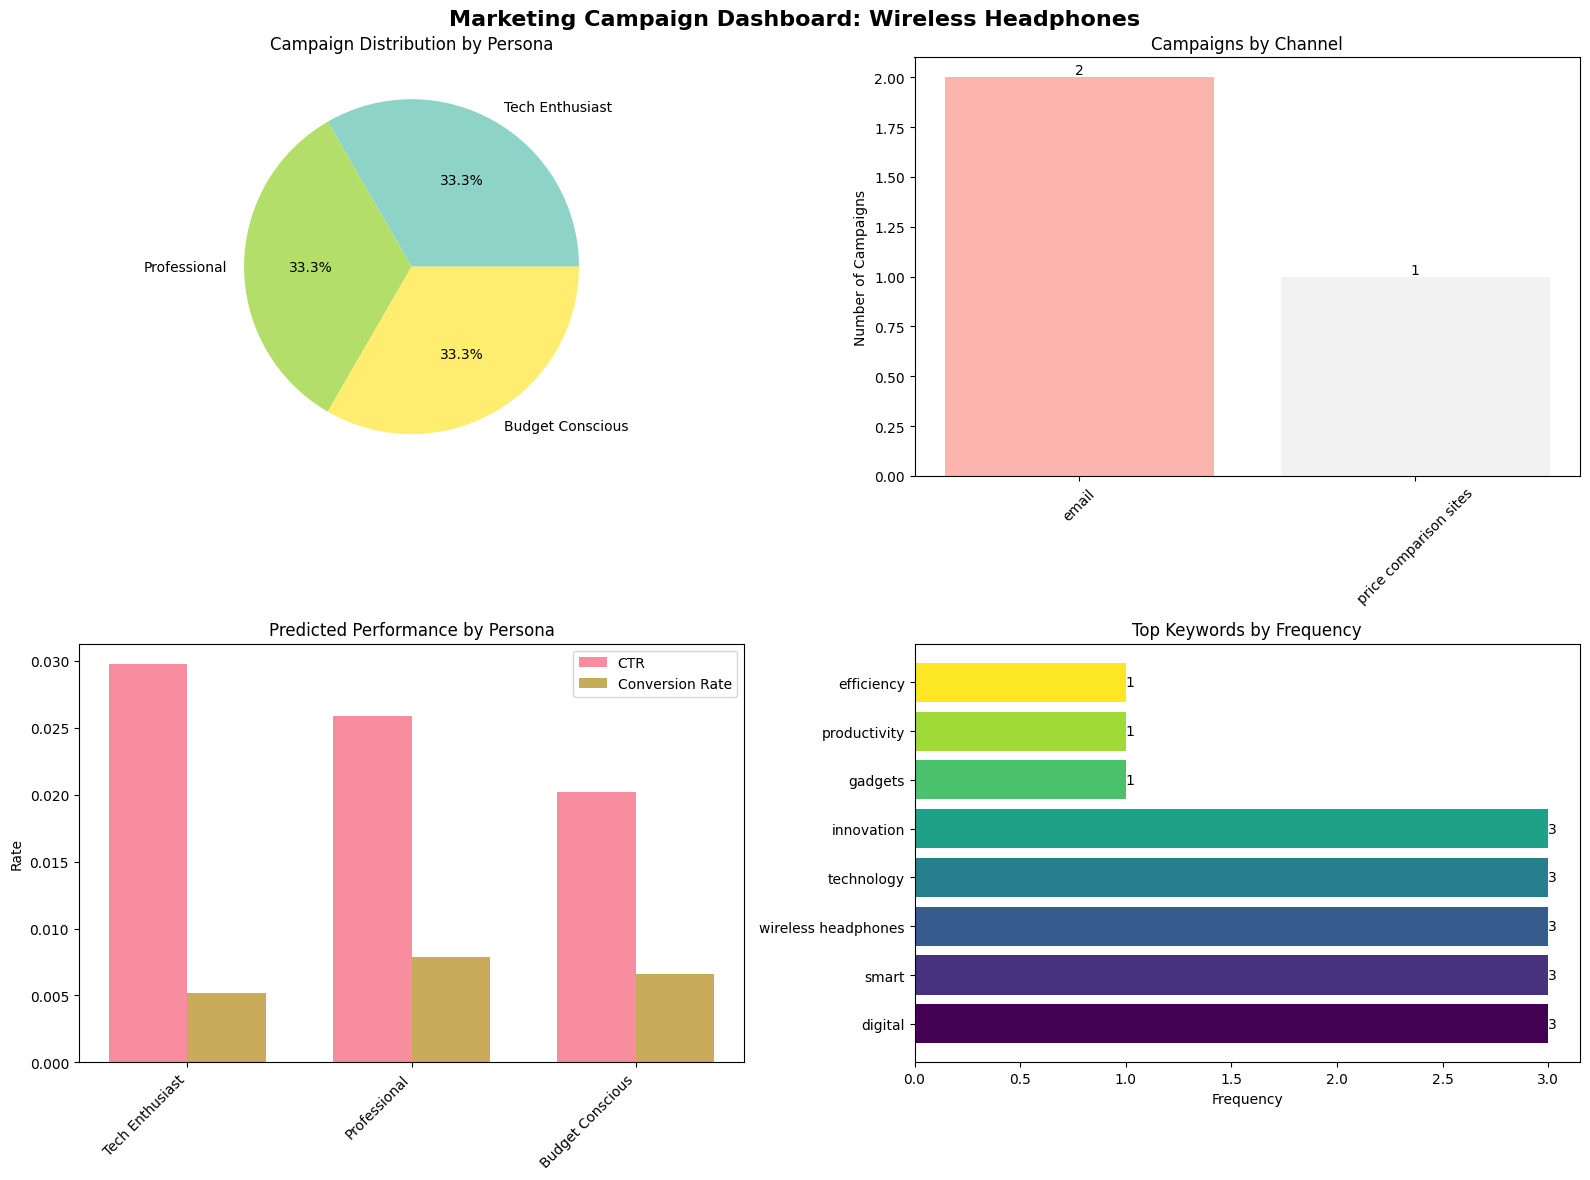

 Creating word cloud...


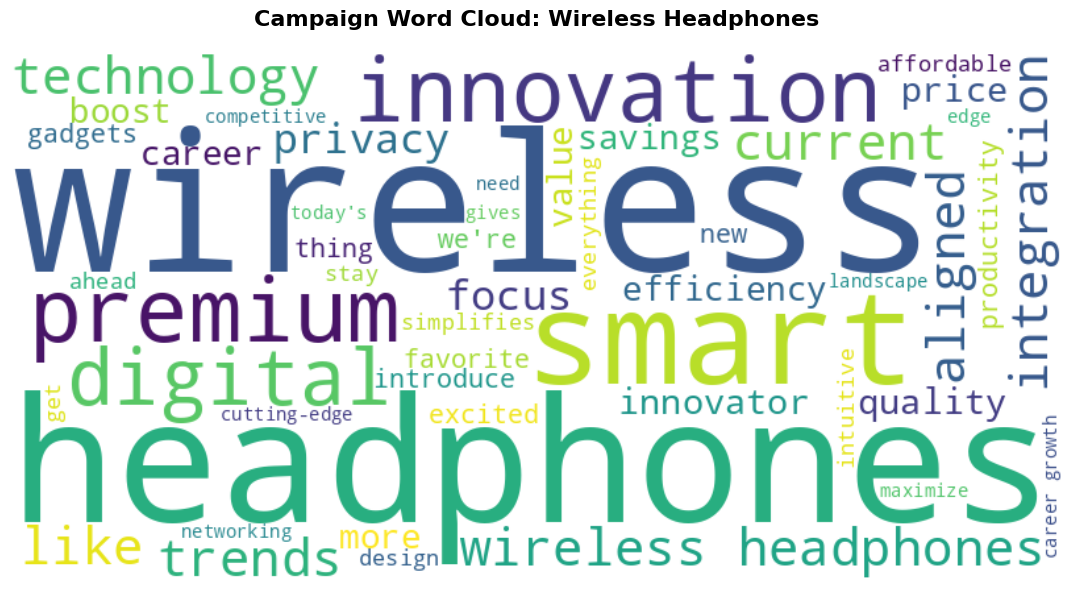

 Creating detailed report...

 CAMPAIGN REPORT TABLE
--------------------------------------------------
Campaign_ID             Product          Persona                Channel         Tone                                           Headline                                          Body_Text                CTA                                           Keywords  Predicted_CTR  Predicted_Conversion  Estimated_Reach  Confidence_Score
   CAMP_001 Wireless Headphones  Tech Enthusiast                  email       casual For the innovator in you: Wireless Headphones: ... For the innovator in you: We're excited to intr...         Learn More digital, smart, gadgets, wireless headphones, t...         0.0298                0.0052             3910          0.842812
   CAMP_002 Wireless Headphones     Professional                  email professional Boost your career: Maximize Efficiency with Wir... Boost your career: In today's competitive lands...  Get Started Today efficiency, digital, smart, care

In [16]:
PRODUCT_NAME = "Wireless Headphones"

print(f"\n GENERATING MARKETING CAMPAIGN FOR: {PRODUCT_NAME}")
print("-"*80)

campaign_results, detailed_report = generate_campaign_for_product(PRODUCT_NAME)

print(f"\n CAMPAIGN GENERATION COMPLETE!")
print(f" Successfully created {len(campaign_results['campaigns'])} personalized campaigns")
print(f" Analytics and visualizations generated")
print(f" Detailed report with {len(detailed_report)} campaign variations ready")




In [18]:
print(f"\n ADDITIONAL INSIGHTS FOR {PRODUCT_NAME}")
print("-"*80)

campaigns = campaign_results['campaigns']
analytics = campaign_results['analytics']

total_predicted_ctr = sum(perf['predicted_ctr'] for perf in analytics['predicted_performance'].values())
total_predicted_conversion = sum(perf['predicted_conversion_rate'] for perf in analytics['predicted_performance'].values())
avg_confidence = np.mean([perf['confidence_score'] for perf in analytics['predicted_performance'].values()])

campaign_score = (total_predicted_ctr + total_predicted_conversion + avg_confidence) / 3 * 100

print(f"\n CAMPAIGN EFFECTIVENESS METRICS")
print(f"{'-'*50}")
print(f"Overall Campaign Score: {campaign_score:.1f}/100")
print(f"Channel Diversity Score: {len(set(c.channel for c in campaigns))/5*100:.1f}%")
print(f"Persona Coverage Score: {len(set(c.persona for c in campaigns))/5*100:.1f}%")
print(f"Content Variety Score: {len(set(c.tone for c in campaigns))/5*100:.1f}%")

best_campaign = max(campaigns, key=lambda c: analytics['predicted_performance'].get(c.persona, {}).get('predicted_ctr', 0))
best_performance = analytics['predicted_performance'][best_campaign.persona]

print(f"\n BEST PERFORMING CAMPAIGN")
print(f"{'-'*50}")
print(f"Persona: {best_campaign.persona}")
print(f"Channel: {best_campaign.channel}")
print(f"Predicted CTR: {best_performance['predicted_ctr']:.2%}")
print(f"Predicted Conversion: {best_performance['predicted_conversion_rate']:.2%}")
print(f"Estimated ROI: {(best_performance['predicted_conversion_rate'] * 50):.1f}x")

print(f"\n SUGGESTED BUDGET ALLOCATION")
print(f"{'-'*50}")
total_budget = 10000  # Example budget
for campaign in campaigns:
    if campaign.persona in analytics['predicted_performance']:
        performance = analytics['predicted_performance'][campaign.persona]
        weight = performance['predicted_ctr'] * performance['confidence_score']
        suggested_budget = (weight / sum(perf['predicted_ctr'] * perf['confidence_score']
                                        for perf in analytics['predicted_performance'].values())) * total_budget
        print(f"{campaign.persona}: ${suggested_budget:.0f} ({suggested_budget/total_budget*100:.1f}%)")

print(f"\n CAMPAIGN READY FOR LAUNCH")
print(f"Visualizations are displayed above for presentation")
print("-"*80)



 ADDITIONAL INSIGHTS FOR Wireless Headphones
--------------------------------------------------------------------------------

 CAMPAIGN EFFECTIVENESS METRICS
--------------------------------------------------
Overall Campaign Score: 30.2/100
Channel Diversity Score: 40.0%
Persona Coverage Score: 60.0%
Content Variety Score: 60.0%

 BEST PERFORMING CAMPAIGN
--------------------------------------------------
Persona: Tech Enthusiast
Channel: email
Predicted CTR: 2.98%
Predicted Conversion: 0.52%
Estimated ROI: 0.3x

 SUGGESTED BUDGET ALLOCATION
--------------------------------------------------
Tech Enthusiast: $4067 (40.7%)
Professional: $3313 (33.1%)
Budget Conscious: $2620 (26.2%)

 CAMPAIGN READY FOR LAUNCH
Visualizations are displayed above for presentation
--------------------------------------------------------------------------------


In [19]:
print(f"\n EXPORT AND SAVE OPTIONS")
print("-"*50)

csv_filename = f"{PRODUCT_NAME.replace(' ', '_')}_marketing_campaign.csv"
detailed_report.to_csv(csv_filename, index=False)
print(f" Campaign report saved as: {csv_filename}")

summary_data = {
    'Product': [PRODUCT_NAME],
    'Total_Campaigns': [len(campaigns)],
    'Campaign_Score': [campaign_score],
    'Generated_Date': [datetime.now().strftime('%Y-%m-%d %H:%M:%S')],
    'Top_Channel': [max(analytics['channel_analysis'].items(), key=lambda x: x[1])[0]],
    'Best_Persona': [best_campaign.persona],
    'Predicted_Avg_CTR': [np.mean([perf['predicted_ctr'] for perf in analytics['predicted_performance'].values()])],
    'Predicted_Avg_Conversion': [np.mean([perf['predicted_conversion_rate'] for perf in analytics['predicted_performance'].values()])]
}

summary_df = pd.DataFrame(summary_data)
summary_filename = f"{PRODUCT_NAME.replace(' ', '_')}_campaign_summary.csv"
summary_df.to_csv(summary_filename, index=False)
print(f" Campaign summary saved as: {summary_filename}")

print(f"\n MULTI-AGENT MARKETING CAMPAIGN SYSTEM EXECUTION COMPLETE")
print("-"*80)




 EXPORT AND SAVE OPTIONS
--------------------------------------------------
 Campaign report saved as: Wireless_Headphones_marketing_campaign.csv
 Campaign summary saved as: Wireless_Headphones_campaign_summary.csv

 MULTI-AGENT MARKETING CAMPAIGN SYSTEM EXECUTION COMPLETE
--------------------------------------------------------------------------------
